<a href="https://colab.research.google.com/github/Caroline132/AI-project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from google.colab.data_table import DataTable

# **Helper functions**

In [ ]:
def getInfoNB(model):
  """ Get information about Naive Bayes model"""
  print("Parameters:")
  print(model.get_params(deep=True))
  print("Classes:")
  print(model.classes_)
  print("Feature:")
  print(model.n_features_in_)
  print("Feature names:")
  print(model.feature_names_in_)

In [ ]:
def getInfoLR(model):
  """Get information about Logistic Regression model"""
  print("Parameters:")
  print(model.get_params(deep=True))
  print("Classes:")
  print(model.classes_)
  print("Coefficients:")
  print(model.coef_)
  print("Intercept:")
  print(model.intercept_)
  print("Feature:")
  print(model.n_features_in_)
  print("Feature names:")
  print(model.feature_names_in_)
  print("Number of iterations:")
  print(model.n_iter_)

In [ ]:
def getInfoMLP(model):
  """Get information about MLP model"""
  print("Parameters:")
  print(model.get_params(deep=True))
  print("Classes:")
  print(model.classes_)
  print("Current loss computed with the loss function:")
  print(model.loss_)
  print("Minimum loss reached by the solver throughout fitting:")
  print(model.best_loss_)
  print("ith element in the list represents the loss at the ith iteration:")
  print(model.loss_curve_)
  print("Number of training samples seen by the solver during fitting:")
  print(model.t_)
  print("Feature:")
  print(model.n_features_in_)
  print("Feature names:")
  print(model.feature_names_in_)
  print("Number of iterations:")
  print(model.n_iter_)
  print("Number of layers:")
  print(model.n_layers_)
  print("Number of outputs:")
  print(model.n_outputs_)
  print("Name of the output activation function:")
  print(model.out_activation_)

In [ ]:
def getOneFoldResults(X_test, y_test, model):
  """Get precision, recall, accuracy and F1-score for 1-fold cross validation"""
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

In [ ]:
def getMultiFoldResults(X, y, model):
  """Get precision, recall, accuracy and F1-score for multi-fold cross validation"""
  # setting the multi-fold cross-validation procedure
  crossValidation = KFold(n_splits=10, random_state=0, shuffle=True)
  # evaluate model
  accuracyScores = cross_val_score(model, X, y, scoring='accuracy', cv=crossValidation, n_jobs=-1)
  precisionScores = cross_val_score(model, X, y, scoring='precision', cv=crossValidation, n_jobs=-1)
  recallScores = cross_val_score(model, X, y, scoring='recall', cv=crossValidation, n_jobs=-1)
  # report performance
  print('Accuracy: %.3f (%.3f)' % (np.mean(accuracyScores), np.std(accuracyScores)))
  print('Precision: %.3f (%.3f)' % (np.mean(precisionScores), np.std(precisionScores)))
  print('Recall: %.3f (%.3f)' % (np.mean(recallScores), np.std(recallScores)))
  return [accuracyScores,precisionScores,recallScores]

In [ ]:
def generateBarPlot(title,values):
  """Generates a bar plot using recall,precision, and accuracy) gotten from getMultiFoldResults"""
  sns.barplot(x=["accuracy","precision","recall"],y=[np.mean(v) for v in values], ci=None)
  plt.title(title)
  plt.xlabel("Values")
  plt.ylabel("")
  i = 0
  for v in values:
      plt.errorbar(i,np.mean(v),yerr=np.std(v),ecolor='black',capsize=10)
      i+=1

In [ ]:
def autolabel(bars,axs,axis):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for rect in bars:
        height = rect.get_height()
        axs[axis].annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(25, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
def plotModelBars(modelType,outputs,cols):
  """Plotting Accuracy, precision and recall for 'cols' results"""
  fig, axs = plt.subplots(ncols=cols,figsize=(20,4),sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0})
  for i in range(0,cols):
    bars = axs[i].bar([0, 1, 2], [np.mean(v) for v in outputs[i]], yerr=[np.std(v) for v in outputs[i]], align='center', ecolor='black', capsize=10, color=['tab:blue', 'tab:orange','tab:green'])
    axs[i].set_xticks([0, 1, 2])
    axs[i].set_xticklabels(["accuracy","precision","recall"])
    axs[i].set_title("Result "+str(i+1))
    autolabel(bars,axs,i)
  plt.suptitle(modelType,fontweight="bold")
  plt.show()

In [ ]:
def plotModelCM(modelType,predictions,y_test,cols):
  """Plotting Confusion Matrices"""
  fig, axs = plt.subplots(ncols=cols,figsize=(20,4.5),sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0})
  for i in range(0,cols):
    matrix = confusion_matrix(y_test, predictions[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=[0, 1])
    disp.plot(ax=axs[i])
    axs[i].set_title("Result "+str(i+1))
    disp.im_.colorbar.remove()
    if i!=0:
      disp.ax_.set_ylabel('')
    if i!=1:
      disp.ax_.set_xlabel('')
  plt.suptitle(modelType,fontweight="bold",horizontalalignment='center',x=0.42)
  fig.colorbar(disp.im_, ax=axs)
  plt.show()

In [ ]:
def findTruePositives(predicted, actual):
  """Find indices of false positives"""
  truePositives = []
  for i in range(0,len(predicted)):
    if predicted[i]==1 and actual[i]==1:
      truePositives.append(i)
  return truePositives

In [ ]:
def findTrueNegatives(predicted, actual):
  """Find indices of true positives"""
  truePositives = []
  for i in range(0,len(predicted)):
    if predicted[i]==0 and actual[i]==0:
      truePositives.append(i)
  return truePositives

In [ ]:
def findFalsePositives(predicted, actual):
  """Find indices of false positives"""
  falsePositives = []
  for i in range(0,len(predicted)):
    if predicted[i]==1 and actual[i]==0:
      falsePositives.append(i)
  return falsePositives

In [ ]:
def findFalseNegatives(predicted, actual):
  """Find indices of false positives"""
  falsePositives = []
  for i in range(0,len(predicted)):
    if predicted[i]==0 and actual[i]==1:
      falsePositives.append(i)
  return falsePositives

# **1. Understand the classification task for your dataset** 
**a. Is it a binary/multi-class classification?**  
* The Kaggle dataset we are using is titled "Student Performance Data Set" [1], and it provides the performance of Portuguese students based on multiple features (see Section 2 for a description of the features).
* The dataset we are using is multi-class as it provides students' school results (column **'G3'**) on a scale from 0 to 20. However, to use it for the Logistic Regression classifier, we will convert the results to a binary classification indicating if the student passed or failed. Furthermore, for consistency purposes, we will keep this binary classification for our three models.
* The article from which the data is sourced provides the following ***binary classification***: "*pass* if G3≥10, else *fail*" [2]. Therefore, we will use this binary classification for our modeling.

**b. What is the goal? Is this for a particular application?** 
* The goal is to use the target attribute G3 (final grade) to predict if a student passes or fails based on multiple features.



# **2. Analyze your dataset** 




##**Load Data**

In [ ]:
# Want all features to be displayed
pd.set_option('max_columns', None)

In [ ]:
# Column descriptions
columnDescription = pd.read_csv('https://raw.githubusercontent.com/Caroline132/project-data/main/Column%20Description.csv')
columnDescription

,Columns,Description
0,school,student's school (binary: 'GP' - Gabriel Perei...
1,sex,student's sex (binary: 'F' - female or 'M' - m...
2,age,student's age (numeric: from 15 to 22)
3,address,student's home address type (binary: 'U' - urb...
4,famsize,family size (binary: 'LE3' - less or equal to ...
5,Pstatus,parent's cohabitation status (binary: 'T' - li...
6,Medu,"mother's education (numeric: 0 - none, 1 - pri..."
7,Fedu,"father's education (numeric: 0 - none, 1 - pri..."
8,Mjob,"mother's job (nominal: 'teacher', 'health' car..."
9,Fjob,"father's job (nominal: 'teacher', 'health' car..."


In [ ]:
# Target attributes description 
gradeDescription = pd.read_csv('https://raw.githubusercontent.com/Caroline132/project-data/main/Grade.csv')
gradeDescription

,Grade,Description
0,G1,first period grade (numeric: from 0 to 20)
1,G2,second period grade (numeric: from 0 to 20)
2,G3,"final grade (numeric: from 0 to 20, output tar..."


In [ ]:
# Load CSV into Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Caroline132/project-data/main/student-por.csv')
print(df.shape)
df.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


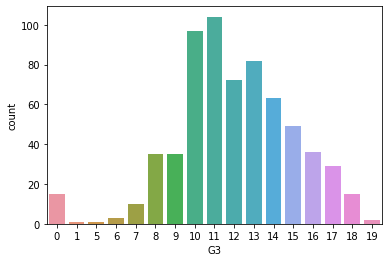

In [ ]:
# G3 (target attribute) grade distribution
sns.countplot(x='G3',data=df)
plt.show()

## **Characterization**
* **Number of training examples:** 649
* **Number of features:** 30
* **Missing data:** none
* **Bias:** as seen in the G3 grade distribution graph above, there is a large bias for passing (grades ≥ 10). Therefore, we must consider this imbalance when implementing our models and analyzing the results.

# **3. Brainstorm about the attributes (Feature engineering)**
* **Are all features present in the dataset?** The 30 features provide a comprehensive view of elements that could impact a student's grade. Thus, we believe that all features are present in the dataset.
* **Are there any missing features?** We think that all necessary features are provided in the dataset. Maybe an interesting additional feature would be a ***mental health*** feature in addition to the more general ***health*** feature since mental health plays a significant role in performance.
* **Any attribute provided that doesn't seem useful to you?** Some features that may not have a significant impact on student performance might be: ***gender*** (both should perform equally), ***guardian*** (having a mother or father as guardian probably has the same effect), ***activities*** (might provide additional noise as some students might have personal activities at home that are not considered), ***romantic*** (may have both a positive and negative impact depending on the quality of the relationship), ***goout*** (both introverted and extroverted people do well in school; thus it might be hard to determine if going out has a great impact on school performance). Nevertheless, we will keep all features for our main results and use Recursive Feature Elimination (see Section 11) to compare afterward.

# **4. Encode the features**


In [ ]:
# Dropping G1 and G2 as we are interested in the G3 target attribute
df = df.drop(columns=['G1', 'G2'])

In [ ]:
# Change G3 to binary classes (0 = Fail and 1 = Pass)
df['G3'] = np.where(df['G3'] <= 10, 0, df['G3'])
df['G3'] = np.where(df['G3'] > 10, 1, df['G3'])

## **Discretization**

In [ ]:
# Discretize features for the Naive Bayes model
dataD = df.copy()
le = LabelEncoder()
dataD = dataD[dataD.columns[:]].apply(le.fit_transform)
dataD.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,3,1,0,0,4,4,0,4,0,1,1,1,0,1,0,0,0,1,1,0,0,3,2,3,0,0,2,4,1
1,0,0,2,1,0,1,1,1,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,4,2,2,0,0,2,2,1
2,0,0,0,1,1,1,1,1,0,2,2,1,0,1,0,1,0,0,0,1,1,1,0,3,2,1,1,2,2,6,1
3,0,0,0,1,0,1,4,2,1,3,1,1,0,2,0,0,1,0,1,1,1,1,1,2,1,1,0,0,4,0,1
4,0,0,1,1,0,1,3,3,2,2,1,0,0,1,0,0,1,0,0,1,1,0,0,3,2,1,0,1,4,0,1


## **One-Hot Encoding**

In [ ]:
# Change binary value features from yes/no values to 1/0
dataOHE = df.copy()
binaryFeatures = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for feature in binaryFeatures:
  dataOHE[feature] = np.where(dataOHE[feature] == 'no', 0, dataOHE[feature])
  dataOHE[feature] = np.where(dataOHE[feature] == 'yes', 1, dataOHE[feature])

In [ ]:
# Make discrete features continuous for the Logistic Regression and Multi-Layer perceptron models
discreteFeatures = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']

for feature in discreteFeatures:
  one_hot_encoded_data = pd.get_dummies(dataOHE[feature],prefix=feature)
  data=dataOHE.join(one_hot_encoded_data)
  dataOHE = data

# Drop discrete features
features = dataOHE.columns.values.tolist()
includedFeatures=[i for i in features if i not in discreteFeatures]
dataOHE=dataOHE[includedFeatures]
dataOHE.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


#**5. Prepare your data for the experiment, using cross-validation**

In [ ]:
# Get x a.nd y data from discretized data
X_D = dataD.drop(columns=['G3'])
y_D = dataD['G3']

In [ ]:
# 1-fold cross-validation test/train discretized data 
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_D, y_D, test_size=0.3, random_state=0)

In [ ]:
# Get x and y data from one-hot encoded data
X_OHE = dataOHE.drop(columns=['G3'])
y_OHE = dataOHE['G3']

In [ ]:
# 1-fold cross-validation test/train one-hot encoded data 
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_OHE, y_OHE, test_size=0.3, random_state=0)

# **6-9. Train 3 models, evaluate with precision/recall measures and repeat**

## **a. Naive Bayes**
*   This section was achieved with the help of the scikit-learn GaussianNB documentation [3] along with a website to understand its implementation [4].

###**Result 1**
* Using the default parameters of the GaussianNB model.

In [ ]:
# Fit model and get information about model
mNB1 =  GaussianNB().fit(X_train_D, y_train_D)
getInfoNB(mNB1)

Parameters:
{'priors': None, 'var_smoothing': 1e-09}
Classes:
[0 1]
Feature:
30
Feature names:
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences']


In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_D, y_test_D, mNB1)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.85      0.89      0.87       140

    accuracy                           0.81       195
   macro avg       0.76      0.74      0.75       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputNB1 = getMultiFoldResults(X_D, y_D, mNB1)

Accuracy: 0.803 (0.055)
Precision: 0.840 (0.052)
Recall: 0.892 (0.065)


In [ ]:
# Get predicted values
predictedNB1 = mNB1.predict(X_test_D)

### **Result 2**
*   Changing the **var_smoothing** parameter to 1e-3, which adjusts the "calculation stability" by modifying the value to the Gaussian distribution variance [3].

In [ ]:
# Fit model and get information about model
mNB2 =  GaussianNB(var_smoothing=1e-3).fit(X_train_D, y_train_D)
getInfoNB(mNB2)

Parameters:
{'priors': None, 'var_smoothing': 0.001}
Classes:
[0 1]
Feature:
30
Feature names:
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences']


In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_D, y_test_D, mNB2)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.85      0.89      0.87       140

    accuracy                           0.81       195
   macro avg       0.76      0.74      0.75       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputNB2 = getMultiFoldResults(X_D, y_D, mNB2)

Accuracy: 0.803 (0.055)
Precision: 0.842 (0.055)
Recall: 0.889 (0.064)


In [ ]:
# Get predicted values
predictedNB2 = mNB2.predict(X_test_D)

### **Result 3**
*   Changing the **var_smoothing** parameter to 1e-15, which adjusts the "calculation stability" by modifying the value to the Gaussian distribution variance [3].

In [ ]:
# Fit model and get information about model
mNB3 =  GaussianNB(var_smoothing=1e-15).fit(X_train_D, y_train_D)
getInfoNB(mNB3)

Parameters:
{'priors': None, 'var_smoothing': 1e-15}
Classes:
[0 1]
Feature:
30
Feature names:
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences']


In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_D, y_test_D, mNB3)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.85      0.89      0.87       140

    accuracy                           0.81       195
   macro avg       0.76      0.74      0.75       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputNB3 = getMultiFoldResults(X_D, y_D, mNB3)

Accuracy: 0.803 (0.055)
Precision: 0.840 (0.052)
Recall: 0.892 (0.065)


In [ ]:
# Get predicted values
predictedNB3 = mNB3.predict(X_test_D)

## **b. Logistic Regression**
*   This section was achieved with the help of the scikit-learn LogisticRegression documentation [5], along with a few articles to understand its implementation [6]-[8].

### **Result 1**
* Using the default parameters of the LogisticRegression model.


In [ ]:
# Fit model and get information about model
mLR1 = LogisticRegression(max_iter=1000).fit(X_train_OHE, y_train_OHE)
getInfoLR(mLR1)

Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classes:
[0 1]
Coefficients:
[[-0.00828445  0.20917731  0.09276444  0.01404267  0.02563638 -1.84479281
  -0.82898606 -0.19863956  0.40764022  0.0434381  -0.21716106  1.39850531
   0.05344759 -0.33579034  0.03333304 -0.10259203  0.01246559  0.06395647
  -0.17964505 -0.03318939 -0.0853485   0.38451417 -0.38197799  0.32919978
  -0.3266636  -0.11953863  0.12207481  0.08925148 -0.08671529  0.03029743
  -0.02776125 -0.3091806   0.37850772 -0.24571824 -0.11284254  0.29176985
   0.4906276  -0.85643252  0.32092175 -0.33498461  0.38240397 -0.42491287
   0.43195294  0.00270843 -0.00721232 -0.06457963 -0.74562581  0.81274163]]
Intercept:
[1.20153877]
Feature:
48
Feature names:
['age' 'Medu' 'Fedu' 'traveltime' 's

In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,mLR1)

              precision    recall  f1-score   support

           0       0.76      0.45      0.57        55
           1       0.81      0.94      0.87       140

    accuracy                           0.81       195
   macro avg       0.79      0.70      0.72       195
weighted avg       0.80      0.81      0.79       195



In [ ]:
# Get results for multi-fold cross-validation
outputLR1 = getMultiFoldResults(X_OHE, y_OHE, mLR1)

Accuracy: 0.790 (0.049)
Precision: 0.815 (0.053)
Recall: 0.912 (0.049)


In [ ]:
# Get predicted values
predictedLR1 = mLR1.predict(X_test_OHE)

### **Result 2**
*   Initially, we tried changing the **solver**, it did not change the results.
* Then we decided to change **class_weight** to 'balanced' to help with the class imbalance. According to sklearn documentation: "[t]he 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))" [5].

In [ ]:
# Fit model and get information about model
mLR2 = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train_OHE, y_train_OHE)
getInfoLR(mLR2)

Parameters:
{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classes:
[0 1]
Coefficients:
[[ 0.00429971  0.15070325  0.10406265 -0.03931896  0.04931277 -1.78345943
  -0.93406057 -0.14977793  0.50907184  0.02699514 -0.04803472  1.36707443
   0.05716175 -0.27716554  0.02392617 -0.08330841 -0.00829661  0.03557208
  -0.15018756 -0.06135554 -0.08948002  0.43087451 -0.43073504  0.34037821
  -0.34023874 -0.11215062  0.11229009  0.11417841 -0.11403895  0.05380845
  -0.05366898 -0.35156952  0.46253366 -0.27096101 -0.16501958  0.32515592
   0.51029893 -0.89159472  0.33356946 -0.30964138  0.35750718 -0.43178941
   0.44651274  0.00724747 -0.02183134 -0.02574813 -0.6878339   0.7137215 ]]
Intercept:
[0.33701396]
Feature:
48
Feature names:
['age' 'Medu' 'Fedu' 'travelti

In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,mLR2)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        55
           1       0.84      0.85      0.84       140

    accuracy                           0.77       195
   macro avg       0.72      0.72      0.72       195
weighted avg       0.77      0.77      0.77       195



In [ ]:
# Get results for multi-fold cross-validation
outputLR2 = getMultiFoldResults(X_OHE, y_OHE, mLR2)

Accuracy: 0.758 (0.055)
Precision: 0.856 (0.055)
Recall: 0.789 (0.056)


In [ ]:
# Get predicted values
predictedLR2 = mLR2.predict(X_test_OHE)

### **Result 3**
*   We changed the **C** parameter from 1.0 to 0.1, which is the "inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization" [5].
* In fact, a high C means the training data is trustworthy, while a low value means the "data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it" [9].

In [ ]:
# Fit model and get information about model
mLR3 = LogisticRegression(max_iter=1000, C=0.1).fit(X_train_OHE, y_train_OHE)
getInfoLR(mLR3)

Parameters:
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classes:
[0 1]
Coefficients:
[[-0.05200945  0.24645071  0.08395525  0.01110523  0.0739319  -1.01668361
  -0.31806569 -0.07833217  0.06673703  0.02436254 -0.08922171  0.62910909
   0.10568869 -0.19417177  0.02859796 -0.10597094  0.00450262 -0.01010926
  -0.118037   -0.05608607 -0.08007653  0.3032762  -0.30298973  0.18786077
  -0.18757431 -0.11979847  0.12008493  0.05421023 -0.05392377  0.0053087
  -0.00502224 -0.13190807  0.08676573 -0.05065515 -0.0578532   0.15393715
   0.11298581 -0.24255406  0.20854795 -0.20202387  0.12333064 -0.26875818
   0.27456746 -0.04926852  0.0437457   0.08901091 -0.31431504  0.22559059]]
Intercept:
[1.67656048]
Feature:
48
Feature names:
['age' 'Medu' 'Fedu' 'traveltime' 'st

In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,mLR3)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.82      0.94      0.88       140

    accuracy                           0.81       195
   macro avg       0.79      0.71      0.73       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputLR3 = getMultiFoldResults(X_OHE, y_OHE, mLR3)

Accuracy: 0.781 (0.047)
Precision: 0.800 (0.055)
Recall: 0.921 (0.049)


In [ ]:
# Get predicted values
predictedLR3 = mLR3.predict(X_test_OHE)

## **c. Multi-Layer Perceptron**
*   This section was achieved with the help of the scikit-learn MLPClassifier documentation [10].

### **Result 1**


*  Using the default parameters of the MLPClassifier model.

In [ ]:
# Fit model and get information about model
clf1 = MLPClassifier(max_iter=1000).fit(X_train_OHE, y_train_OHE)
getInfoMLP(clf1)

Parameters:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Classes:
[0 1]
Current loss computed with the loss function:
0.012563755555300959
Minimum loss reached by the solver throughout fitting:
0.012004778705288648
ith element in the list represents the loss at the ith iteration:
[1.7662960270540504, 1.1474085013287545, 0.759710066116525, 0.6595556771080601, 0.711567539193994, 0.7571688344632891, 0.7464957220843728, 0.6956360918520884, 0.6418916055295943, 0.6096524017296202, 0.6007205946585431, 0.6008425972150213, 0.597220083621174, 0.5859412808801261, 0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,clf1)

              precision    recall  f1-score   support

           0       0.60      0.51      0.55        55
           1       0.82      0.86      0.84       140

    accuracy                           0.76       195
   macro avg       0.71      0.69      0.69       195
weighted avg       0.76      0.76      0.76       195



In [ ]:
# Get results for multi-fold cross-validation
outputMLP1 = getMultiFoldResults(X_OHE, y_OHE, clf1)

Accuracy: 0.758 (0.063)
Precision: 0.812 (0.053)
Recall: 0.860 (0.045)


In [ ]:
# Get predicted values
predictedMLP1 = clf1.predict(X_test_OHE)

### **Result 2**
*   Changing the **solver** to 'sgd', which is the "stochastic gradient descent" instead of the default 'adam' solver [10].

In [ ]:
# Fit model and get information about model
clf2 = MLPClassifier(max_iter=1000, solver='sgd').fit(X_train_OHE, y_train_OHE)
getInfoMLP(clf2)

Parameters:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Classes:
[0 1]
Current loss computed with the loss function:
0.4125068113071645
Minimum loss reached by the solver throughout fitting:
0.4100418148683278
ith element in the list represents the loss at the ith iteration:
[0.6343659047422641, 0.6192470421509702, 0.6135477435160395, 0.6079171945190767, 0.6043815846357549, 0.5997038290156862, 0.5944511921199407, 0.5887120170132778, 0.5850139978546267, 0.5822684683287931, 0.5777224297746978, 0.5736700192327597, 0.5703803485603026, 0.567590822503846, 0.56

In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,clf2)

              precision    recall  f1-score   support

           0       0.71      0.53      0.60        55
           1       0.83      0.91      0.87       140

    accuracy                           0.81       195
   macro avg       0.77      0.72      0.74       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputMLP2 = getMultiFoldResults(X_OHE, y_OHE, clf2)

Accuracy: 0.786 (0.057)
Precision: 0.808 (0.058)
Recall: 0.909 (0.049)


In [ ]:
# Get predicted values
predictedMLP2 = clf2.predict(X_test_OHE)

### **Result 3**
*   Since the 'sgd' solver improved the Model 2 performance, we decided to keep the **solver** as 'sgd' and also set **warm_start** to True, which aims to use previously learned weights "to fit as initialization" [10].

In [ ]:
# Fit model and get information about model
clf3 = MLPClassifier(max_iter=1000, solver='sgd',warm_start=True).fit(X_train_OHE, y_train_OHE)
getInfoMLP(clf3)

Parameters:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': True}
Classes:
[0 1]
Current loss computed with the loss function:
0.4132468812580978
Minimum loss reached by the solver throughout fitting:
0.41086812530855343
ith element in the list represents the loss at the ith iteration:
[0.7887508166298617, 0.7447973238418579, 0.7264509976787041, 0.7059016502209035, 0.6864930066651809, 0.6715871382534344, 0.6581739500618513, 0.6515098610647228, 0.6439596680276738, 0.6369603606229784, 0.6323541254841113, 0.6290591185858534, 0.6239306715030424, 0.6191181479518276, 0.6

In [ ]:
# Get results for 1-fold cross-validation
getOneFoldResults(X_test_OHE,y_test_OHE,clf3)

              precision    recall  f1-score   support

           0       0.74      0.51      0.60        55
           1       0.83      0.93      0.88       140

    accuracy                           0.81       195
   macro avg       0.78      0.72      0.74       195
weighted avg       0.80      0.81      0.80       195



In [ ]:
# Get results for multi-fold cross-validation
outputMLP3 = getMultiFoldResults(X_OHE, y_OHE, clf3)

Accuracy: 0.781 (0.055)
Precision: 0.808 (0.061)
Recall: 0.917 (0.061)


In [ ]:
# Get predicted values
predictedMLP3 = clf3.predict(X_test_OHE)

# **10. Analyze the obtained results**
* Sources were consulted to understand how to plot a bar chart, see [11], generate the confusion matrix, see [12], and create subplots, see [13].



## **a. Qualitative analysis of 9 results**

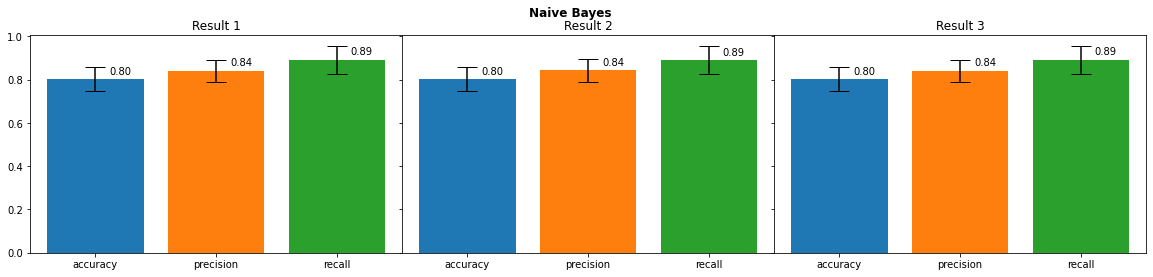

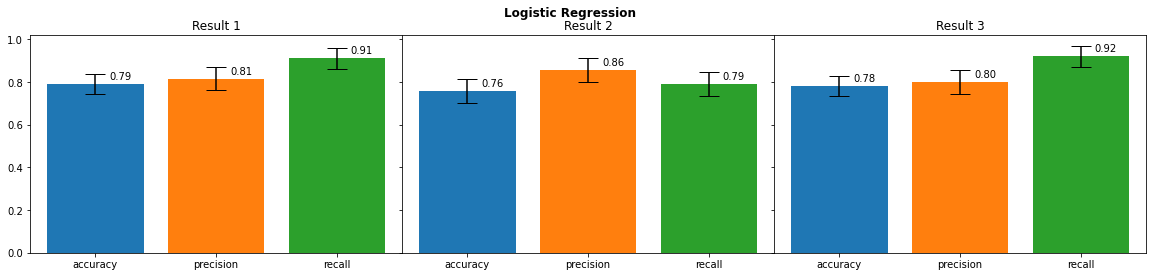

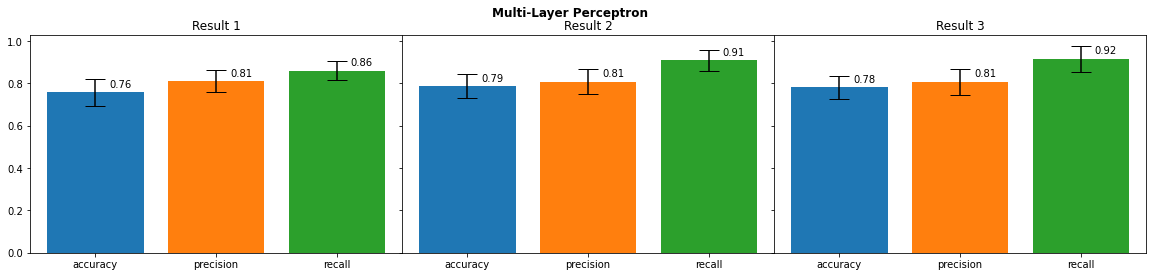

In [ ]:
# Accuracy, precision and recall of 10-fold cross-validation results
plotModelBars("Naive Bayes",[outputNB1,outputNB2,outputNB3],3)
plotModelBars("Logistic Regression",[outputLR1,outputLR2,outputLR3],3)
plotModelBars("Multi-Layer Perceptron",[outputMLP1,outputMLP2,outputMLP3],3)

### **Analysis**
* The ***Naive Bayes*** results are all the same in terms of accuracy, precision, and recall. If you look at the individual output for each result (see section 9), you see a minimal difference (only change at three decimal places). Thus, changing the var_smoothing parameter does not significantly impact the results, which means that the data samples are close to the distribution mean. 
* The ***Logistic Regression*** results perform slightly differently. Result 1 (default values) is relatively good for the three values and the best for accuracy. Result 2 (class_weight='balanced') is the best for precision (reduced number of false positives) but performs relatively poorly for recall (increased number of false negatives). Result 3 (C=0.1) is also good for all three values and is the best for recall (reduced number of false negatives).
* The ***Multi-Layer Perceptron*** results perform similarly. Result 1 (default values) performs the best for precision but is the worse for recall and accuracy by a small amount. Result 2 (solver='sgd') performs the best for recall (reduced number of false negatives). Result 3 (solver='sgd' and warm_start=True) performs similarly to Model 2 and is the best for accuracy (increased amount of true positives and negatives) by a small amount.
* We can see this tradeoff between precision and recall. If the model is too rigid, there will be a higher precision, but we get a low recall.

## **b. Show good and not good results (false positives and negatives)**

### **b.1. General overview using confusion matrices**

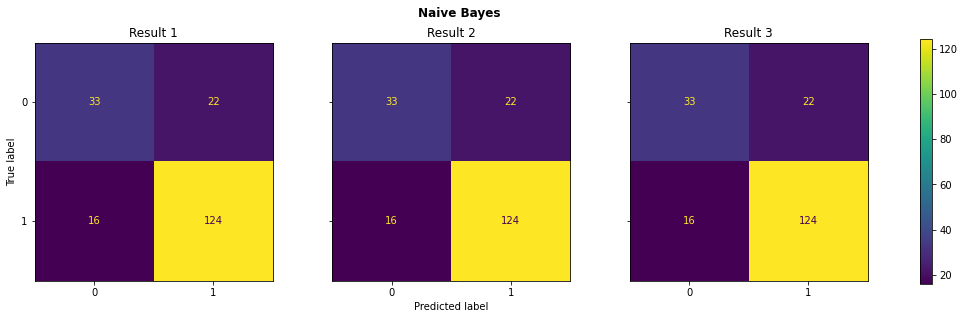

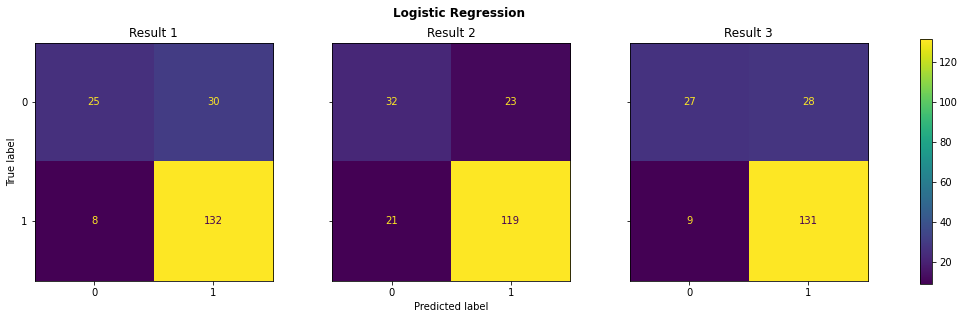

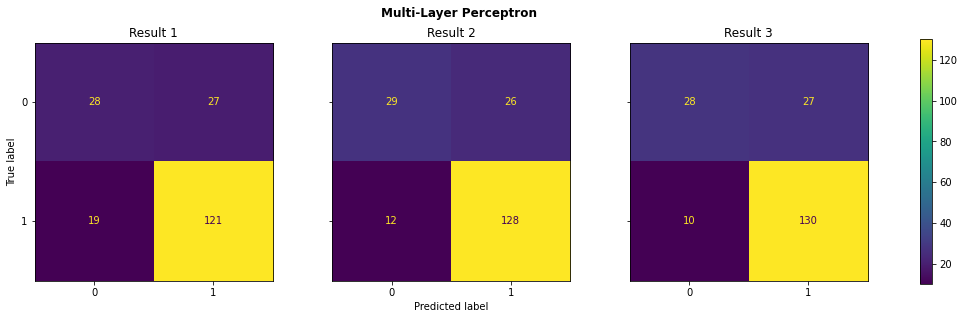

In [ ]:
# Confusion matrices (True negatives & positives and False negatives & positives)
plotModelCM("Naive Bayes",[predictedNB1, predictedNB1, predictedNB1],y_test_D,3)
plotModelCM("Logistic Regression",[predictedLR1, predictedLR2, predictedLR3],y_test_OHE,3)
plotModelCM("Multi-Layer Perceptron",[predictedMLP1, predictedMLP2, predictedMLP3],y_test_OHE,3)

**Analysis**
* Out of all three model types, ***Naive Bayes*** has the most true negatives, which is good considering the significant bias for positive values in the dataset.
* Out of the three ***Logistic Regression*** results, Result 1 (default values) has the least false positives but the most false negatives. This is probably due to the bias in the data for positive values. Result 2 (class_weight='balanced') has the least false negatives but the most false positives, possibly from the 'balanced' class_weight that adjusts weights inversely proportional to class frequencies. Result 3 (C=0.1) is similar to Result 1, good for predicting true positives and negatives. This is probably because the data is trustworthy and does not need much regularization.
* The ***Multi-Layer Perceptron*** results perform similarly to the Logistic Regression results. However, it is better than the Naive Bayes model at predicting true negatives. It may be because it is a more complex model, and there is a bias for positive values.

### **b.2. Analysis of examples of results**

* In section b.1. above, we got an overview of each model's false positive and negative results. We will now look closely at examples of rows that triggered good (true positives and negatives) and bad (false positives and negatives) results for the Naive Bayes model.

In [ ]:
# Get all false positives indices from results for the NB Model 1
falsePositives_NB = findFalsePositives(predictedNB1,y_test_D.to_numpy())

# Show affected rows in datafrane that correspond to the false positives
X_test_NB_FP = X_test_D.copy()
X_test_NB_FP.reset_index(drop=True, inplace=True)
X_test_NB_FP.loc[np.array(falsePositives_NB)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,1,1,1,0,1,2,1,1,3,2,1,1,1,0,0,0,0,0,0,1,1,1,3,1,1,0,3,4,2
3,1,0,3,1,0,1,2,3,0,3,0,0,1,0,0,0,1,0,0,1,1,1,1,4,1,2,0,1,3,0
11,0,1,4,0,0,1,3,2,0,3,1,2,0,0,0,0,1,0,0,0,1,0,1,4,2,3,1,1,4,0
13,0,0,3,0,0,1,3,1,2,2,3,1,0,1,0,0,0,0,1,1,1,1,1,4,2,2,0,0,3,4
19,1,1,2,1,0,1,1,1,0,3,2,1,2,1,0,0,0,0,0,1,1,1,1,4,0,2,2,2,0,0


In [ ]:
# Get all true positives indices from results for the NB Model 1
truePositives_NB = findTruePositives(predictedNB1,y_test_D.to_numpy())

# Show affected rows in datafrane that correspond to the true positives
X_test_NB_TP = X_test_D.copy()
X_test_NB_TP.reset_index(drop=True, inplace=True)
X_test_NB_TP.loc[np.array(truePositives_NB)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
1,0,0,2,1,1,1,0,2,0,0,1,0,1,2,0,0,0,0,0,1,1,1,0,2,2,2,1,2,1,0
2,0,1,3,0,1,0,3,4,2,2,3,1,1,1,0,0,1,0,1,1,1,1,0,3,1,4,2,3,0,6
5,1,0,0,0,0,1,3,3,3,2,3,1,0,1,0,0,1,0,0,1,1,1,1,3,4,3,0,0,0,4
6,0,0,2,1,0,1,3,3,2,2,1,1,0,2,0,0,0,0,1,0,1,0,0,2,1,2,0,0,3,2
7,0,0,2,1,0,1,3,2,2,2,0,1,0,1,0,0,0,0,1,0,1,1,0,4,2,3,0,2,2,2


In [ ]:
# Get all false negatives indices from results for the NB Model 1
falseNegatives_NB = findFalseNegatives(predictedNB1,y_test_D.to_numpy())

# Show affected rows in datafrane that correspond to the false negatives
X_test_NB_FN = X_test_D.copy()
X_test_NB_FN.reset_index(drop=True, inplace=True)
X_test_NB_FN.loc[np.array(falseNegatives_NB)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
55,0,0,4,1,1,0,2,3,0,2,1,2,1,0,1,0,0,0,0,1,0,1,0,1,1,2,2,3,4,16
57,0,1,2,1,0,1,1,2,0,3,2,2,1,1,0,0,0,0,1,0,1,1,0,3,3,3,3,4,4,16
88,1,0,1,1,0,1,3,3,2,2,3,1,0,0,0,0,0,0,1,1,0,1,1,3,4,3,0,0,3,0
90,0,1,3,1,1,1,3,1,3,3,0,1,1,0,0,0,0,0,1,1,1,1,1,2,2,3,3,4,3,2
93,0,1,0,1,1,0,2,1,3,2,0,1,3,0,0,0,0,0,0,1,1,1,0,3,4,4,1,4,4,0


In [ ]:
# Get all true negatives indices from results for the NB Model 1
trueNegatives_NB = findTrueNegatives(predictedNB1,y_test_D.to_numpy())

# Show affected rows in datafrane that correspond to the false negatives
X_test_NB_TN = X_test_D.copy()
X_test_NB_TN.reset_index(drop=True, inplace=True)
X_test_NB_TN.loc[np.array(trueNegatives_NB)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
4,1,0,4,1,0,1,2,3,0,3,0,2,0,0,1,0,0,0,0,1,0,1,1,3,3,3,0,0,1,0
18,0,0,0,1,1,0,2,1,0,2,1,1,1,0,0,0,1,0,1,1,0,1,1,3,3,1,0,0,4,0
29,1,0,3,1,0,1,1,1,2,2,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,4,6
35,1,1,2,1,0,1,3,3,1,2,0,1,1,1,1,0,1,0,0,1,1,1,0,3,4,3,1,2,2,4
36,1,0,5,1,0,1,3,3,0,3,2,1,1,1,1,0,0,0,1,1,1,1,1,2,2,3,1,3,2,8


**Analysis**
* The ***false positives*** and true positives both have no previous failures (failures=0), which could be a solid indicator for passing.
* The ***false negatives*** had almost no study time or many absences, which could indicate failure.
* Some features may add noise to the dataset by not being helpful to predict. Also, there is the possibility that the data was badly annotated or the wrong feature values were entered.

# **11. Extra Elements**

## **a. Dropping features using Recursive Feature Elimination** 
*   During the features engineering (see Section 3), we mentioned some useless features that might add noise to the dataset and affect the models. Thus, we will use Recursive Feature Elimination (RFE) to use the most important features in predicting.
* sklearn.feature_selection.RFE [14] requires a supervised learning estimator with an attribute about feature importance (e.g., coef_). Thus, we will use the sklearn.linear_model.LogisticRegression model as it does provide this attribute.


In [ ]:
# Logistic Regression
lrRFE = LogisticRegression(max_iter=1000)
rfe = RFE(lrRFE)
rfe = rfe.fit(X_OHE, y_OHE)
toDrop = []
for i in range(0,len(rfe.support_)):
  if rfe.support_[i] == False:
    toDrop.append(X_OHE.columns.values[i])
X_LR = X_OHE.drop(columns=toDrop)
X_train_LR = X_train_OHE.drop(columns=toDrop)
X_test_LR = X_test_OHE.drop(columns=toDrop)
lrRFE = lrRFE.fit(X_train_LR, y_train_OHE)

In [ ]:
# Get results for multi-fold cross-validation
outputLR_RFE = getMultiFoldResults(X_LR, y_OHE, lrRFE)

Accuracy: 0.794 (0.052)
Precision: 0.815 (0.058)
Recall: 0.916 (0.052)


In [ ]:
# Get predicted values
predictedLR_RFE = lrRFE.predict(X_test_LR)

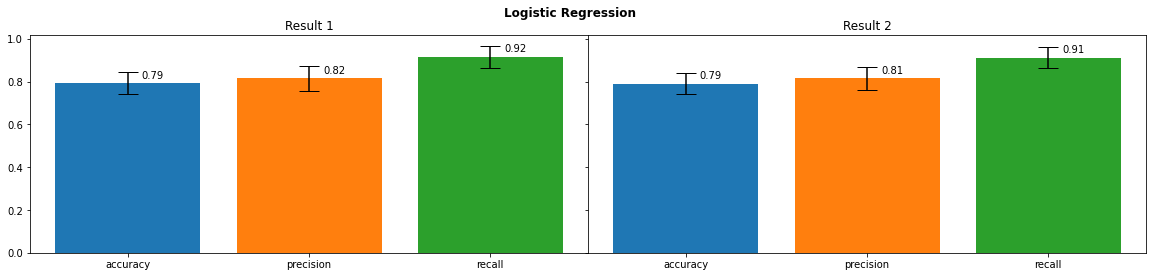

In [ ]:
# Accuracy, precision and recall
plotModelBars("Logistic Regression",[outputLR_RFE,outputLR1],2)

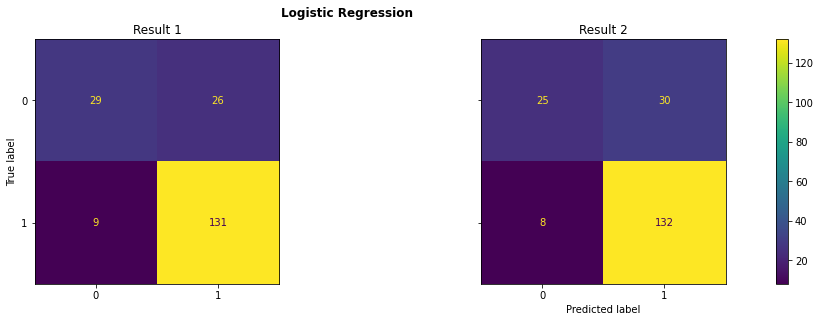

In [ ]:
# Confusion matrices (True negatives & positives and False negatives & positives)
plotModelCM("Logistic Regression",[predictedLR_RFE, predictedLR1],y_test_OHE,2)


### **Analysis**
* Observing the first graph above, we can see that the RFE model (Result 1) performs slightly better for precision and recall than the default Logistic Regression model (Result 2). 
* Looking at the second graph, we see that the RFE model (Result 1) is slightly better at predicting negative values (more true negatives).
* Both models are very similar, but the RFE model is a bit better for precision, recall and predicting negative values.

## **b. Reducing data bias using SMOTE algorithm (Synthetic Minority Oversampling Technique)**
* Since our classes our imbalanced (more passes than fails), we can use the SMOTE algorithm [15] that creates synthetic samples from the minor class (fail) instead of making copies. This allows for reducing the bias in our data.

In [ ]:
oversample = SMOTE(random_state=0)

# Get oversampled data for LR and MLP models
oversample = SMOTE(random_state=0)
columns = X_OHE.columns
os1_data_X,os1_data_y=oversample.fit_resample(X_OHE, y_OHE)
os1_data_X = pd.DataFrame(data=os1_data_X,columns=columns)
os1_data_y= pd.DataFrame(data=os1_data_y,columns=['G3'])

os1_data_X=os1_data_X[columns]
os1_data_y=os1_data_y['G3']
X_train_os1, X_test_os1, y_train_os1, y_test_os1 = train_test_split(os1_data_X, os1_data_y, test_size=0.3, random_state=0)

# Get oversampled data for NB models
columns = X_D.columns
os2_data_X,os2_data_y=oversample.fit_resample(X_D, y_D)
os2_data_X = pd.DataFrame(data=os2_data_X,columns=columns)
os2_data_y= pd.DataFrame(data=os2_data_y,columns=['G3'])

os2_data_X=os2_data_X[columns]
os2_data_y=os2_data_y['G3']
X_train_os2, X_test_os2, y_train_os2, y_test_os2 = train_test_split(os2_data_X, os2_data_y, test_size=0.3, random_state=0)

In [ ]:
nbOS = GaussianNB().fit(X_train_os2, y_train_os2)
lrOS = LogisticRegression(max_iter=1000).fit(X_train_os1, y_train_os1)
mlpOS = MLPClassifier(max_iter=1000).fit(X_train_os1, y_train_os1)

In [ ]:
# Get results for multi-fold cross-validation
outputNB_os = getMultiFoldResults(os2_data_X, os2_data_y, nbOS)
outputLR_os = getMultiFoldResults(os1_data_X, os1_data_y, lrOS)
outputMLP_os = getMultiFoldResults(os1_data_X, os1_data_y, mlpOS)

Accuracy: 0.769 (0.051)
Precision: 0.744 (0.065)
Recall: 0.820 (0.047)
Accuracy: 0.842 (0.033)
Precision: 0.819 (0.049)
Recall: 0.879 (0.051)
Accuracy: 0.823 (0.032)
Precision: 0.824 (0.039)
Recall: 0.856 (0.040)


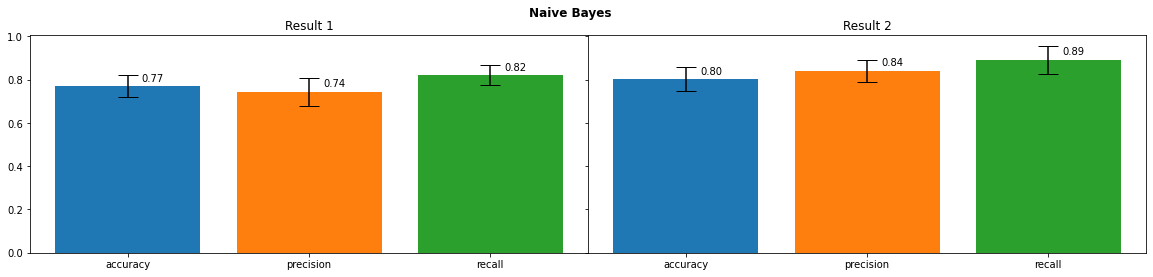

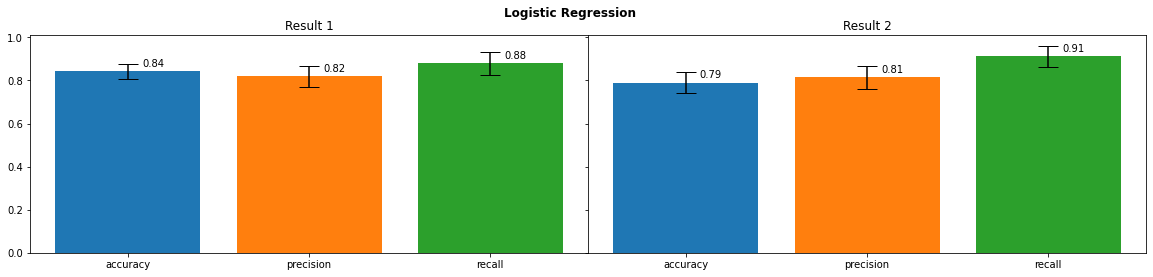

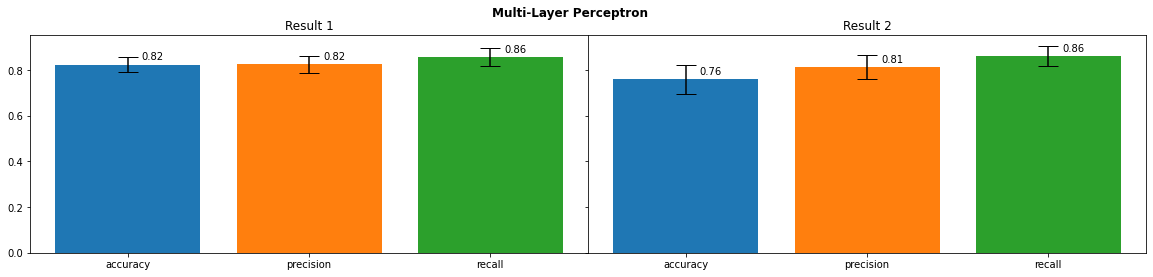

In [ ]:
# Accuracy, precision and recall
plotModelBars("Naive Bayes",[outputNB_os,outputNB1],2)
plotModelBars("Logistic Regression",[outputLR_os,outputLR1],2)
plotModelBars("Multi-Layer Perceptron",[outputMLP_os,outputMLP1],2)


### **Analysis**
* In the Naive Bayes graph, we see the oversampled model (Result 1) performs worse than the default model (Result 2). 
* In the Logistic Regression graph, we see the oversampled model (Result 1) performs slightly better in accuracy and precision than the default model (Result 2). 
* In the Logistic Regression graph, we see the oversampled model (Result 1) performs slightly better in accuracy and precision than the default model (Result 2). 
* In the Multi-Layer Perceptron graph, we see that the oversampled model (Result 1) performs better for accuracy and precision than the default model (Result 2).
* Since the oversampled model performs worse for Naive Bayes, it should probably not be used for this type of model. However, it could be used for Logistic Regression and Multi-Layer Perception models as there is a bias in the data.

# **12. References**
[1] 	D.-S. Sean, "Student Performance Data Set," Kaggle, 2019. [Online]. Available: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set. 

[2] 	P. Cortez and A. Silva, "Using Data Mining to Predict Secondary School Student Performance," in Proceedings of 5th FUture BUsiness TEChnology Conference, Porto, 2008. 

[3] 	scikit-learn, "sklearn.naive_bayes.GaussianNB," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

[4] 	A. Navlani, "Naive Bayes Classification Tutorial using Scikit-learn," DataCamp, December 2018. [Online]. Available: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn. 

[5] 	"sklearn.linear_model.LogisticRegression," scikit-learn, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. 

[6] 	S. Li, "Building A Logistic Regression in Python, Step by Step," Towards Data Science, 28 September 2017. [Online]. Available: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8. 

[7] 	A. J. Mayer, "Using K-Fold Cross-Validation to Evaluate the Performance of Logistic Regression," Python in Plain English, 7 May 2021. [Online]. Available: https://python.plainenglish.io/using-k-fold-cross-validation-to-evaluate-the-performance-of-logistic-regression-4439215f24c4. 

[8] 	M. Stojiljković, "Logistic Regression in Python," Real Python, 13 January 2020. [Online]. Available: https://realpython.com/logistic-regression-python/. 
 
[9] 	A. Almestekawy, "what is C parameter in sklearn Logistic Regression?," Stack Exchange Inc, 13 May 2021. [Online]. Available: https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression. 

[10] 	"sklearn.neural_network.MLPClassifier," scikit-learn, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. 

[11] 	"Grouped bar chart with labels," Matplotlib, [Online]. Available: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py. 

[12] 	"sklearn.metrics.plot_confusion_matrix," scikit-learn, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. 

[13] "Creating multiple subplots using plt.subplot," Matplotlib, [Online]. Available: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html.

[14] "sklearn.feature_selection.RFE," scikit-learn, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

[15] "SMOTE," imbalanced-learn, [Online]. Available: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html.